# Descriptive analysis

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

In [2]:
conn_tennis = sqlite3.connect('tennis_data/LudovicDenoyer_data/atp_database')
conn_foot = sqlite3.connect('foot_data/foot_database')
c_tennis = conn_tennis.cursor()
c_foot = conn_foot.cursor()

In [3]:
c_tennis.execute('''select count(*), date from matches group by date;''')
c_foot.execute('''select count(*), date from matches group by date;''')
cdates_tennis = c_tennis.fetchall()
cdates_foot = c_foot.fetchall()

In [4]:
dates_tennis = [{'date':cdate[1], 'count':cdate[0]} for cdate in cdates_tennis]
dates_foot = [{'date':cdate[1], 'count':cdate[0]} for cdate in cdates_foot]

df_tennis = pd.DataFrame(dates_tennis)
df_tennis.date = pd.to_datetime(df_tennis.date)
df_tennis.set_index(['date'], inplace=True)

df_foot = pd.DataFrame(dates_foot)
df_foot.date = pd.to_datetime(df_foot.date)
df_foot.set_index(['date'], inplace=True)

### Plotting of Tennis

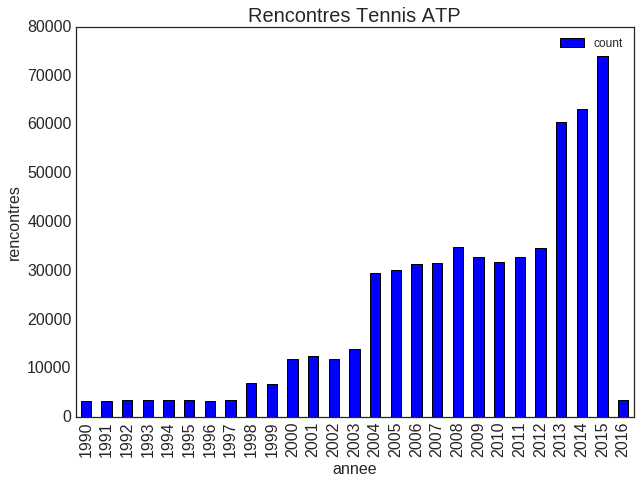

In [5]:
y_gr_count_tennis=pd.groupby(df_tennis, by=[df_tennis.index.year]).sum()
plt.figure(figsize=(10,7))
ax = plt.gca()
plt.ylabel('rencontres', fontsize=16)
plt.xlabel('annee', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
y_gr_count_tennis.plot(kind='bar',ax = ax)
plt.title('Rencontres Tennis ATP', fontsize=20)

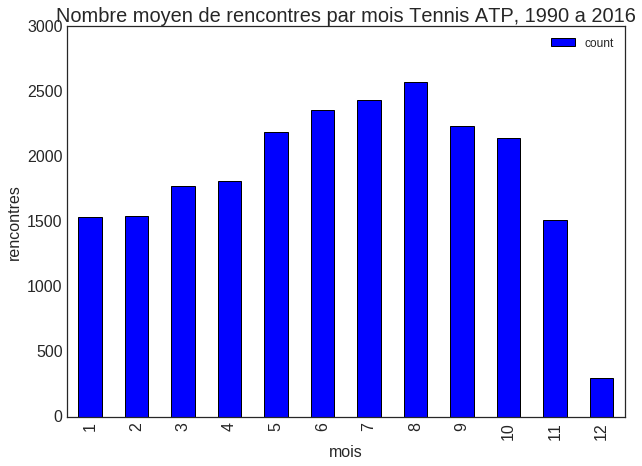

In [6]:
gr_count_tennis=pd.groupby(df_tennis, by=[df_tennis.index.month]).sum()/26
plt.figure(figsize=(10,7))
ax = plt.gca()
plt.ylabel('rencontres', fontsize=16)
plt.xlabel('mois', fontsize=16)
gr_count_tennis.plot(ax=ax,kind='bar')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Nombre moyen de rencontres par mois Tennis ATP, 1990 a 2016',fontsize=20)

### Plotting of Football

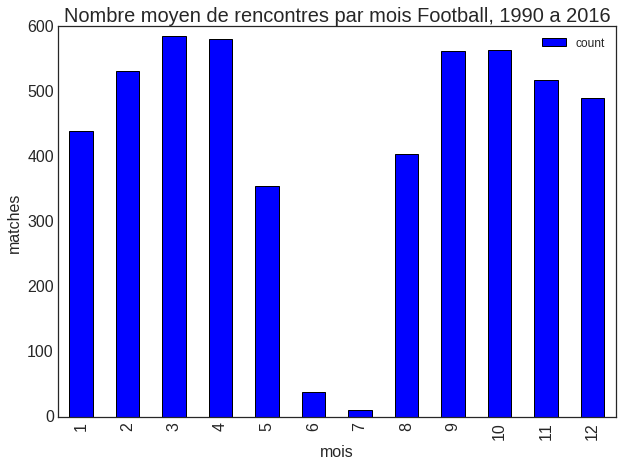

In [7]:
df_foot.index.month.astype('int')
d = pd.groupby(df_foot, by=[df_foot.index.month])
d = d.sum()/15.3
plt.figure(figsize=(10,7))
ax = plt.gca()
plt.ylabel('matches',fontsize=16)
plt.xlabel('mois',fontsize=16)
d.plot(ax=ax,kind='bar')
ax.set_xticklabels([int(float(a.get_text())) for a in ax.get_xticklabels()])
plt.title('Nombre moyen de rencontres par mois Football, 1990 a 2016',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)

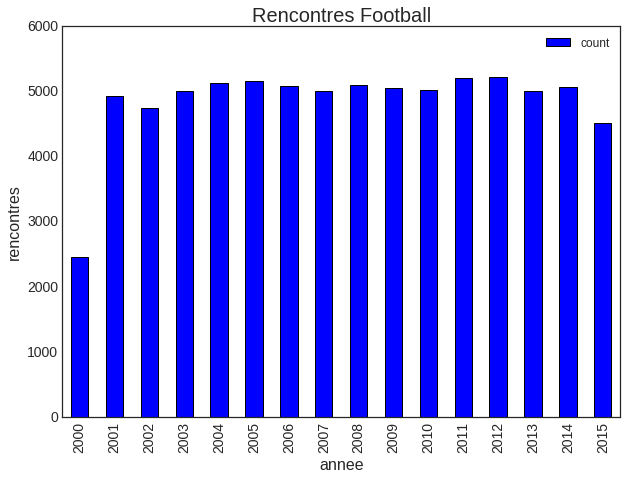

In [8]:
plt.figure(figsize=(10,7))
ax = plt.gca()

y_gr_count_foot=pd.groupby(df_foot, by=[df_foot.index.year]).sum()
y_gr_count_foot.plot(ax=ax,kind='bar')
plt.ylabel('rencontres', fontsize=16)
plt.xlabel('annee', fontsize=16)
plt.title('Rencontres Football', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
ax.set_xticklabels([int(float(a.get_text())) for a in ax.get_xticklabels()])

## nb joueurs

In [9]:
c_tennis.execute('''select count(*),j1_id from matches group by j1_id;''')
win_tennis = c_tennis.fetchall()
c_tennis.execute('''select count(*),j2_id from matches group by j2_id;''')
los_tennis = c_tennis.fetchall()


c_foot.execute('''select count(*),j1_id from matches group by j1_id;''')
win_foot = c_foot.fetchall()
c_foot.execute('''select count(*),j2_id from matches group by j2_id;''')
los_foot = c_foot.fetchall()

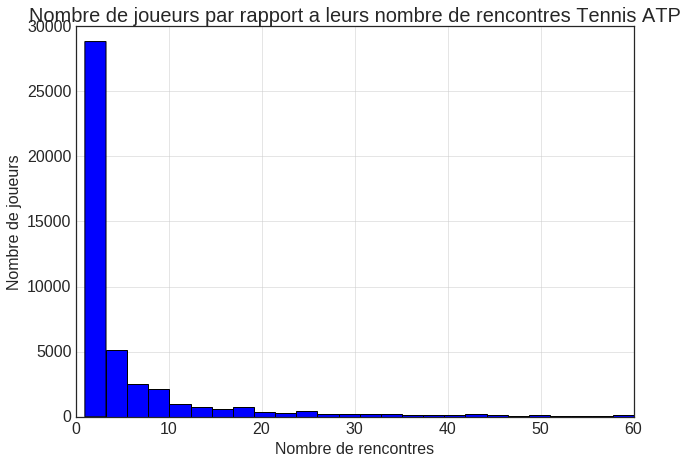

In [10]:
j1_tennis = pd.DataFrame(win_tennis, columns=['count', 'j1_id'])
j1_tennis = j1_tennis.set_index('j1_id',drop=True)
j2_tennis = pd.DataFrame(los_tennis, columns=['count', 'j2_id'])
j2_tennis = j2_tennis.set_index('j2_id',drop=True)

count_tennis = j1_tennis.add(j2_tennis, fill_value=0)
plt.figure(figsize=(10,7))
ax = plt.gca()
count_tennis.hist(ax=ax,bins=600)
plt.xlim([0,60])
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('Nombre de joueurs',fontsize=16)
plt.xlabel('Nombre de rencontres',fontsize=16)
plt.title('Nombre de joueurs par rapport a leurs nombre de rencontres Tennis ATP',fontsize=20)

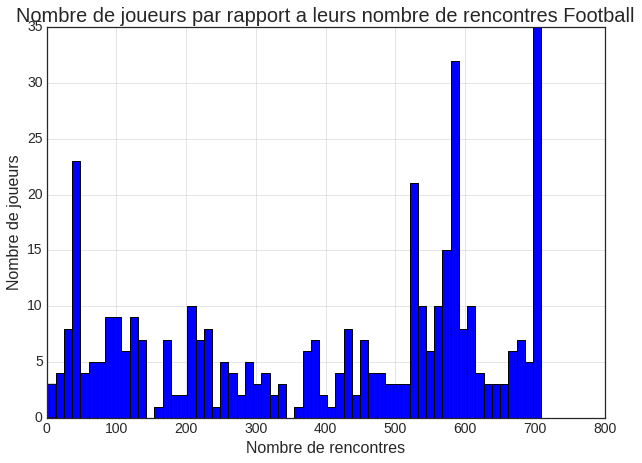

In [11]:
j1_foot = pd.DataFrame(win_foot, columns=['count', 'j1_id'])
j1_foot = j1_foot.set_index('j1_id',drop=True)
j2_foot = pd.DataFrame(los_foot, columns=['count', 'j2_id'])
j2_foot = j2_foot.set_index('j2_id',drop=True)

count_foot = j1_foot.add(j2_foot, fill_value=0)

plt.figure(figsize=(10,7))
ax = plt.gca()
count_foot.hist(bins=60,ax=ax)
#plt.xlim([0,60])
plt.tick_params(axis='both', which='major', labelsize=14)

plt.ylabel('Nombre de joueurs',fontsize=16)
plt.xlabel('Nombre de rencontres',fontsize=16)
plt.title('Nombre de joueurs par rapport a leurs nombre de rencontres Football',fontsize=20)

## ratio cotes

In [12]:
c_tennis.execute('''select count(*) from matches where j1_odds and j2_odds;''')
odds_tennis = c_tennis.fetchall()
c_tennis.execute('''select count(*) from matches;''')
total_tennis = c_tennis.fetchall()
tennis_ratio = float(odds_tennis[0][0])/total_tennis[0][0]

In [13]:
c_foot.execute('''select count(*) from matches where j1_odds and j2_odds;''')
odds_foot = c_foot.fetchall()
c_foot.execute('''select count(*) from matches;''')
total_foot = c_foot.fetchall()
foot_ratio = float(odds_foot[0][0])/total_foot[0][0]

In [14]:
ratio = pd.DataFrame([{'football':foot_ratio, 'tennis':tennis_ratio}])
ratio

football    tennis
0         1  0.120695

## essai

In [19]:
c_tennis.execute('''select j1_odds,j2_odds from matches where j1_odds and j2_odds;''')
odds_tennis = c_tennis.fetchall()

70375
140750
[ 1.42  2.65  1.45 ...,  3.38  1.29  3.64]


(0.0, 20)

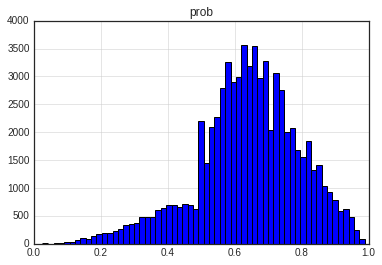

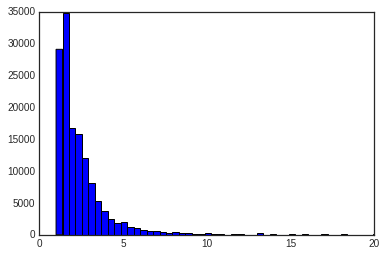

In [34]:
#odds_tennis
prob = []
for o in odds_tennis:
    prob.append(float(o[1])/(float(o[1])+float(o[0])))
print len(prob)

p = pd.DataFrame([{'prob':p} for p in prob])
#od = pd.DataFrame([{'odds':float(o[0])} for o in odds_tennis])
p.hist(bins=60)

pprob = []
for o in odds_tennis:
    pprob.append(float(o[1])/(float(o[1])+float(o[0])))
    pprob.append(float(o[0])/(float(o[1])+float(o[0])))

print len(pprob)
#plt.xlim([1,6])
#plt.title('repartition des cotes au tennis')
#p
oddsh_tennis = []
for o in odds_tennis:
    oddsh_tennis.append(float(o[0]))
    oddsh_tennis.append(float(o[1]))
oddsh_tennis=np.array(oddsh_tennis)
print oddsh_tennis
plt.figure()
plt.hist(oddsh_tennis,bins=220)
plt.xlim([0.,20])

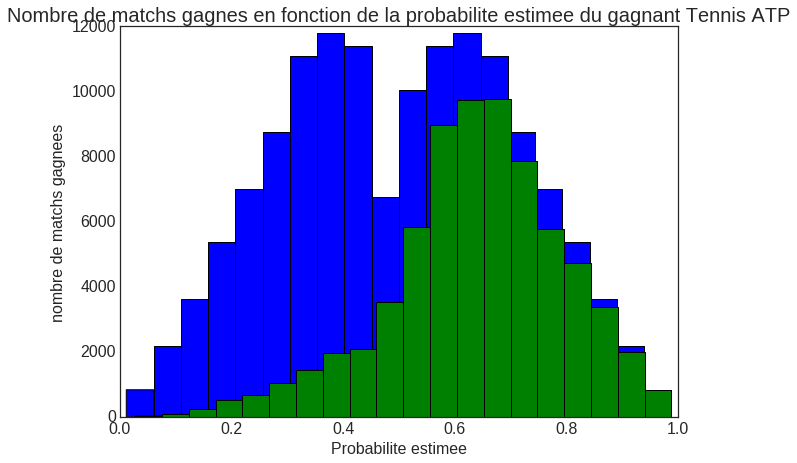

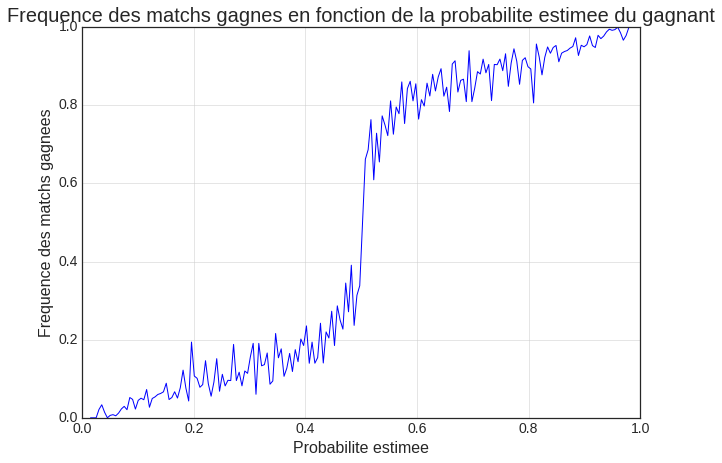

In [41]:
x,y = np.histogram(prob,bins=np.linspace(0,1,200))
xp,yp = np.histogram(pprob,bins=np.linspace(0,1,200))
#print x
#plt.plot(y[:-1],x)
#plt.plot(yp[:-1],xp)
plt.figure(figsize=(10,7))
plt.hist(pprob,bins=20)
plt.title('Nombre de matchs gagnes en fonction de la probabilite estimee du gagnant Tennis ATP',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('nombre de matchs gagnees',fontsize=16)
plt.xlabel('Probabilite estimee',fontsize=16)
plt.hist(prob,bins=20)
#print xp
xn = x.astype('float64')/xp.astype('float64')
#print y
plt.figure(figsize=(10,7))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.plot(y[1:],xn)
plt.grid()
plt.xlabel('Probabilite estimee',fontsize=16)

plt.ylabel('Frequence des matchs gagnees',fontsize=16)

plt.title('Frequence des matchs gagnes en fonction de la probabilite estimee du gagnant',fontsize=20)

### foot

In [46]:
c_foot.execute('''select j1_odds,draw_odds,j2_odds,winner from matches where j1_odds and draw_odds and j2_odds;''')
odds_foot = c_foot.fetchall()


In [47]:
d={'-1':[1,2],'0':[0,2],'1':[0,1]}
win_odds=[[c[d[c[3]][0]],c[d[c[3]][1]]] for c in odds_foot]

In [48]:
prob = []
pprob=[]

for w,o in zip(win_odds,odds_foot):
    o1=float(o[0])
    o2=float(o[1])
    o3=float(o[2])
    pprob.append(o2*o3/(o1*o2+o2*o3+o1*o3))
    pprob.append(o1*o3/(o1*o2+o2*o3+o1*o3))
    pprob.append(o1*o2/(o1*o2+o2*o3+o1*o3))
    win = [float(oi) for oi in w]
    if len(win) != 2:
        print('Error!')
    prob.append(float(win[0])*float(win[1])/(o1*o2+o2*o3+o1*o3))


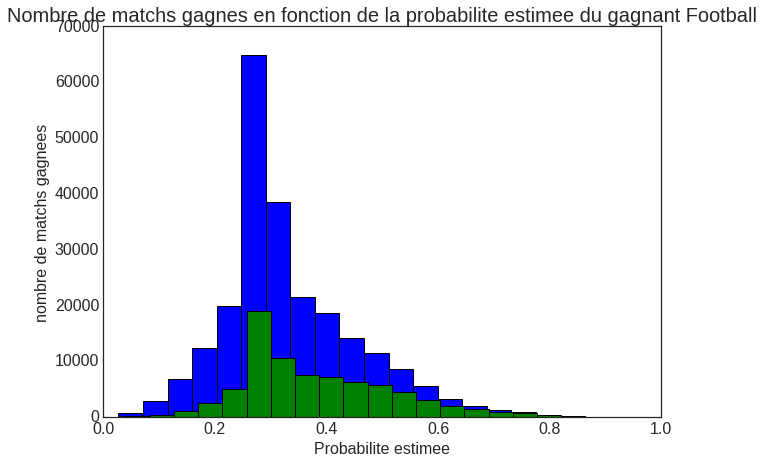

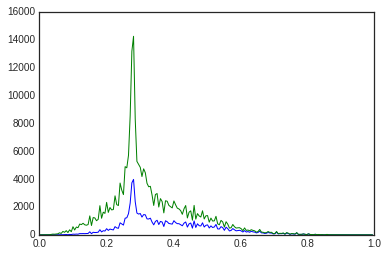

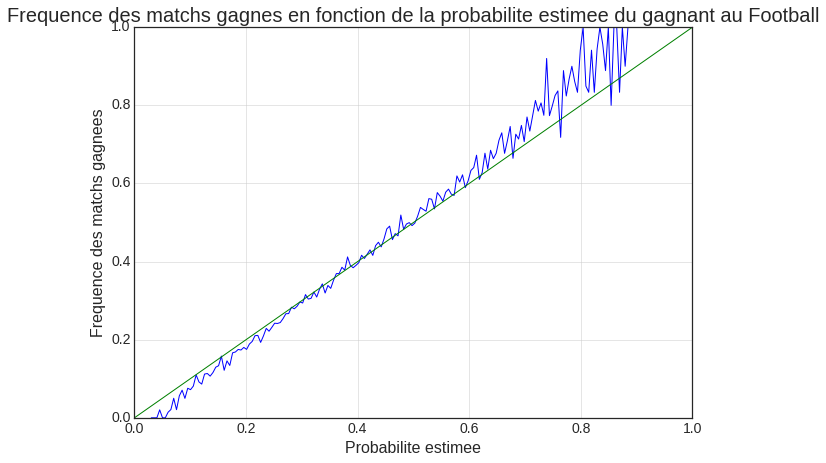

In [49]:
x,y = np.histogram(prob,bins=np.linspace(0,1,200))
xp,yp = np.histogram(pprob,bins=np.linspace(0,1,200))
#print x
plt.figure(figsize=(10,7))
plt.title('Nombre de matchs gagnes en fonction de la probabilite estimee du gagnant Football',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('nombre de matchs gagnees',fontsize=16)
plt.xlabel('Probabilite estimee',fontsize=16)
plt.hist(pprob,bins=20)
plt.hist(prob,bins=20)

plt.figure()
plt.plot(y[:-1],x)
plt.plot(yp[:-1],xp)
xn = x.astype('float64')/xp.astype('float64')
plt.figure(figsize=(10,7))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.plot(y[1:],xn)
plt.plot([0.,1.],[0.,1.])
plt.grid()
plt.xlabel('Probabilite estimee',fontsize=16)
plt.ylabel('Frequence des matchs gagnees',fontsize=16)
plt.title('Frequence des matchs gagnes en fonction de la probabilite estimee du gagnant au Football',fontsize=20)

## age

In [111]:
c_tennis.execute('''select j1_age,j2_age,date from matches;''')
age_tennis = c_tennis.fetchall()

In [92]:
for a in zip(age_tennis):
    m = re.search('.*/.*/(\d{4}).*',a[0])
    if m is None:
        
    else:
        .group(1)

1971
1972
1969
1970
1974
1975
1974
1975
1970
1973
1972
1971
1968
1972
1975
1971
1965
1974
1968
1972
1971
1972
1970
1974
1974
1970
1968
1972
1971
1974
1971
1970
1973
1971
1970
1972
1973
1967
1974
1978
1968
1970
1966
1967
1976
1972
1977
1968
1973
1971
1970
1974
1973
1971
1970
1967
1974
1968
1970
1967
1970
1974
1972
1973
1972
1973
1977
1972
1975
1974
1971
1976
1975
1972
1974
1975
1972
1968
1973
1972
1973
1975
1972
1972
1973
1977
1972
1975
1972
1974
1975
1972
1973
1974
1969
1971
1975
1966
1974
1971
1976
1970
1972
1968
1971
1970
1972
1975
1974
1971
1975
1974
1971
1976
1969
1975
1974
1971
1976
1970
1972
1970
1974
1976
1971
1973
1972
1969
1967
1971
1968
1972
1974
1975
1970
1972
1970
1974
1974
1971
1965
1966
1970
1970
1975
1970
1972
1967
1974
1978
1971
1975
1973
1968
1975
1974
1974
1976
1971
1970
1974
1966
1974
1971
1976
1967
1975
1973
1972
1970
1965
1975
1970
1973
1972
1971
1973
1969
1967
1971
1968
1968
1970
1975
1974
1969
1971
1965
1973
1972
1975
1971
1974
1976
1967
1975
1971
1972
1976
1967


AttributeError: 'NoneType' object has no attribute 'group'

In [86]:
re.search('.*/.*/(\d{4}).*', 'fdj//1892').group(1)

'1892'

In [75]:
import re
print [re.findall(a, r'.*/.*/(\d{4}).*')[0] for a in age_tennis]

TypeError: first argument must be string or compiled pattern